In [183]:
import json
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [6]:
def uniform(el):
    # sorted list of values for multi-value attributes
    if el == el:  # NaN is different from NaN, np.isnan and pd.isna don't work
        if '|' in el:
            el = sorted(el.split('|'))
        elif isinstance(el, list):
            el = sorted(el)
    return el


def create_df_annotations(path, dataset):  # datset in [vat, tp, ecj]
    temp = []

    language = os.listdir(path)[0].split('_')[0]

    for filename in os.listdir(path):
        with open(os.path.join(path, filename), 'r', encoding='utf8') as f:
            data = json.load(f)
            annotations = data["annotations"]

            for annotation in annotations:
                if annotation["name"] != 'conc' and annotation["name"] != 'prem':
                    continue
                #document = annotation["document"]
                document = data["document"]["name"]
                name = annotation["name"]
                _id = annotation["_id"]
                text = data["document"]["plainText"][int(annotation["start"]):int(annotation["end"])]
                # attribute extraction, NaN if that attribute is not present
                T = uniform(annotation["attributes"].get("T", np.nan))
                SUP = uniform(annotation["attributes"].get("SUP", np.nan))
                SFF = uniform(annotation["attributes"].get("SFF", np.nan))
                ATT = uniform(annotation["attributes"].get("ATT", np.nan))
                INH = uniform(annotation["attributes"].get("INH", np.nan))
                REPH = uniform(annotation["attributes"].get("REPH", np.nan))
                S = uniform(annotation["attributes"].get("S", np.nan))

                text = text.lstrip('‘’\'\n0123456789.-–…;;) ')
                text = text.rstrip('‘’\'\n.;; ')

                temp.append([document,
                             name,
                             _id,
                             text,
                             T,
                             SUP,
                             SFF,
                             ATT,
                             INH,
                             REPH,
                             S])
    # df creation
    df = pd.DataFrame(temp,
                      columns=['Document', 'Name', 'Id', 'Text', 'Type', 'SUP', 'SFF',
                               'ATT', 'INH', 'REPH', 'Scheme'])
    
    df.to_pickle("./Dataframes/arg_annotations_" + language + '_' + dataset + ".pkl")


create_df_annotations('Data/Dataset/VAT_ITA', 'vat')


In [2]:
df = pd.read_pickle("Dataframes/arg_annotations_italian_vat.pkl")

In [3]:
df.describe()

,Document,Name,Id,Text,Type,SUP,SFF,ATT,INH,REPH,Scheme
count,3311,3311,3311,3311,2910,1088,82,66,25,89,1314
unique,225,2,264,3163,3,428,48,32,19,31,63
top,2016_202_VAT_OPAM_2_1_PS_AN,prem,A2,,F,A2,A7,A8,A10,A1,Rule
freq,79,2910,221,12,1572,54,6,8,3,29,349


In [4]:
df.head()

,Document,Name,Id,Text,Type,SUP,SFF,ATT,INH,REPH,Scheme
0,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A1,"In via preliminare, il Collegio prende in cons...",F,NaN,NaN,NaN,NaN,NaN,NaN
1,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A2,"Ai sensi dell'art. 14 del d.lgs.546/92, se l'o...",L,NaN,NaN,NaN,NaN,NaN,Rule
2,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A3,Se il ricorso non è stato\n proposto da o n...,L,NaN,NaN,NaN,NaN,NaN,Itpr
3,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A4,Nel caso di specie solo la ILDS ha presentato ...,F,NaN,NaN,NaN,NaN,NaN,NaN
4,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A5,come\n espressamente richiesto nel ricorso ...,F,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#check whether there are any null values for ARGUMENT CLASSIFICATION(AC) task (Name column), and if it's the case then drop them
df_ac = df[~(df['Name'].isnull())].reset_index(drop=True)
df_ac['Name'].unique()

array(['prem', 'conc'], dtype=object)

In [125]:
#check whether there are any null values for TYPE CLASSIFICATION(TC) task (Type column), and if it's the case then drop them
df_tc = df_ac[~(df_ac['Type'].isnull())].reset_index(drop=True) 
df_tc.describe()
df_tc['Type'].drop_duplicates()


0          F
1          L
13    [F, L]
Name: Type, dtype: object

In [82]:
#check whether there are any null values for SCHEME CLASSIFICATION(SC) task (Scheme column), and if it's the case then drop them
df_sc = df_tc[~(df_tc['Scheme'].isnull())].reset_index(drop=True) 
#print(df_sc.describe())
df_sc['Scheme'].drop_duplicates()

0                      Rule
1                      Itpr
4                      Prec
15             [Itpr, Prec]
21                      Aut
               ...         
1223    [Class, Itpr, Rule]
1240           [Acon, Itpr]
1241          [Class, Tele]
1276     [Prec, Rule, Syst]
1282     [Aut, Itpr, Princ]
Name: Scheme, Length: 63, dtype: object

In [193]:
df_ac.describe().drop('top',axis=0)

,Document,Name,Id,Text,Type,SUP,SFF,ATT,INH,REPH,Scheme
count,3311,3311,3311,3311,2910,1088,82,66,25,89,1314
unique,225,2,264,3163,3,428,48,32,19,31,63
freq,79,2910,221,12,1572,54,6,8,3,29,349


In [192]:
df_tc.describe().drop('top',axis=0)

,Document,Name,Id,Text,Type,SUP,SFF,ATT,INH,REPH,Scheme
count,2910,2910,2910,2910,2910,691,42,66,25,20,1314
unique,225,1,255,2797,3,299,28,32,19,16,63
freq,78,2910,214,11,1572,30,4,8,3,2,349


In [197]:
df_sc.describe().drop('top', axis=0)

,Document,Name,Id,Text,Type,SUP,SFF,ATT,INH,REPH,Scheme
count,1314,1314,1314,1314,1314,272,14,9,14,3,1314
unique,203,1,164,1256,3,129,11,7,13,3,63
freq,41,1314,103,3,1000,15,2,2,2,1,349


#TYPE CLASSIFICATION MULTILABELBINARIZER

In [ ]:
df_tc.loc[13,'Type']

['F', 'L']

In [ ]:
#need to extract the values from the list, in a way to pass it to the multilabelbinarizer
for i in range(len(df_tc)):
    x = df_tc.loc[i,'Type']
    if type(x) == list:
        df_tc.loc[i,'Type'] = ",".join([x[0],x[1]])
         

In [ ]:
df_tc.loc[13,'Type']

'F,L'

In [170]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_result = mlb.fit_transform([str(df_tc.loc[i,'Type']).split(',') for i in range(len(df_tc))])
df_tc_final = pd.concat([df_tc,pd.DataFrame(mlb_result,columns=list(mlb.classes_))],axis=1)
df_tc_final

,Document,Name,Id,Text,Type,SUP,SFF,ATT,INH,REPH,Scheme,F,L
0,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A1,"In via preliminare, il Collegio prende in cons...",F,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A2,"Ai sensi dell'art. 14 del d.lgs.546/92, se l'o...",L,NaN,NaN,NaN,NaN,NaN,Rule,0,1
2,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A3,Se il ricorso non è stato\n proposto da o n...,L,NaN,NaN,NaN,NaN,NaN,Itpr,0,1
3,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A4,Nel caso di specie solo la ILDS ha presentato ...,F,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A5,come\n espressamente richiesto nel ricorso ...,F,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,2021_6075_VAT_OPAM_2_1_PS_AN,prem,C15,Sotto questo profilo i Compro Oro sono sottopo...,L,NaN,NaN,NaN,NaN,NaN,Rule,0,1
2906,2021_6075_VAT_OPAM_2_1_PS_AN,prem,C16,Tale comunicazione ha luogo quando i destinata...,L,NaN,NaN,NaN,NaN,NaN,Rule,0,1
2907,2021_6075_VAT_OPAM_2_1_PS_AN,prem,C17,"Il Ministro dell'interno, con decreto del 17 f...",L,NaN,NaN,NaN,NaN,NaN,Rule,0,1
2908,2021_6075_VAT_OPAM_2_1_PS_AN,prem,C18,Tra i soggetti destinatari del decreto sono ri...,L,NaN,NaN,NaN,NaN,NaN,"[Class, Rule]",0,1


In [175]:
df_tc_labels = df_tc_final[['F','L']]
df_tc_labels

,F,L
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
2905,0,1
2906,0,1
2907,0,1
2908,0,1


#DATA ANALYSIS

<Axes: >

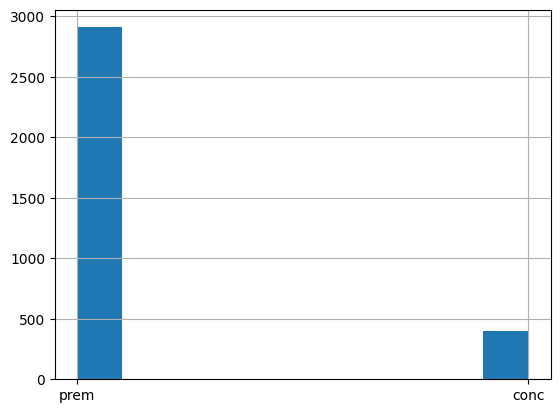

In [84]:
df_ac['Name'].hist()

In [190]:
print(f"There are {len(df_ac[df_ac['Name'] == 'prem'])} premises and {len(df_ac[df_ac['Name'] == 'conc'])} conclusions")

There are 2910 premises and 401 conclusions


<BarContainer object of 2 artists>

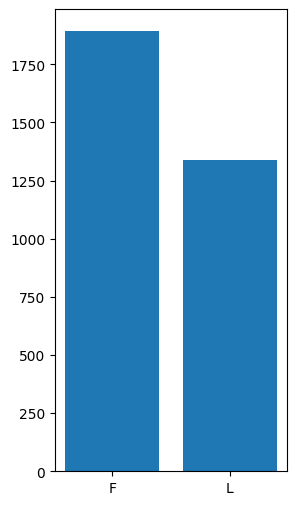

In [186]:
values = df_tc_labels.sum().sort_values(ascending=False)
y = np.array(values)
x = np.array(values.index)

plt.figure(figsize=(3,6))
plt.bar(x, height=y)

In [89]:
df_tc

,Document,Name,Id,Text,Type,SUP,SFF,ATT,INH,REPH,Scheme
0,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A1,"In via preliminare, il Collegio prende in cons...",F,NaN,NaN,NaN,NaN,NaN,NaN
1,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A2,"Ai sensi dell'art. 14 del d.lgs.546/92, se l'o...",L,NaN,NaN,NaN,NaN,NaN,Rule
2,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A3,Se il ricorso non è stato\n proposto da o n...,L,NaN,NaN,NaN,NaN,NaN,Itpr
3,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A4,Nel caso di specie solo la ILDS ha presentato ...,F,NaN,NaN,NaN,NaN,NaN,NaN
4,2013_40_VAT_OPAM_2_REM_MB_PS_AN,prem,A5,come\n espressamente richiesto nel ricorso ...,F,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2905,2021_6075_VAT_OPAM_2_1_PS_AN,prem,C15,Sotto questo profilo i Compro Oro sono sottopo...,L,NaN,NaN,NaN,NaN,NaN,Rule
2906,2021_6075_VAT_OPAM_2_1_PS_AN,prem,C16,Tale comunicazione ha luogo quando i destinata...,L,NaN,NaN,NaN,NaN,NaN,Rule
2907,2021_6075_VAT_OPAM_2_1_PS_AN,prem,C17,"Il Ministro dell'interno, con decreto del 17 f...",L,NaN,NaN,NaN,NaN,NaN,Rule
2908,2021_6075_VAT_OPAM_2_1_PS_AN,prem,C18,Tra i soggetti destinatari del decreto sono ri...,L,NaN,NaN,NaN,NaN,NaN,"[Class, Rule]"
